# Visualization tools

In this tutorial, we will use `seqikpy` to visualize the results.

In [1]:
# Import the necessary libraries
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from seqikpy.utils import make_video

from seqikpy.alignment import AlignPose, convert_from_df3dpp_to_dict
from seqikpy.kinematic_chain import KinematicChainSeq
from seqikpy.leg_inverse_kinematics import LegInvKinSeq

from seqikpy.visualization import (
                                get_frames_from_video_ffmpeg,
                                  load_grid_plot_data,
                                  plot_grid_generator,
                                  get_plot_config,
                                  plot_grid,
                                  video_frames_generator)

# Set up the constant variables
leg_joint_angle_names = [
    "ThC_yaw",
    "ThC_pitch",
    "ThC_roll",
    "CTr_pitch",
    "CTr_roll",
    "FTi_pitch",
    "TiTa_pitch",
]

head_angles_to_plot = [
    "Angle_head_roll",
    "Angle_head_pitch",
    "Angle_head_yaw",
    "Angle_antenna_pitch_L",
    "Angle_antenna_pitch_R",
]

In [11]:
# Load the data
data_path = Path("../data/anipose_pose-220807_aJO-GAL4xUAS-CsChr_Fly002_002_Beh")
video_path_front = data_path / "camera_3.mp4"
video_path_side = data_path / "camera_5.mp4"

> [!NOTE]
> Note that the plot below is written specifically for front leg, head kinematics. One can easily extend this code to plot all six legs for locomotion.

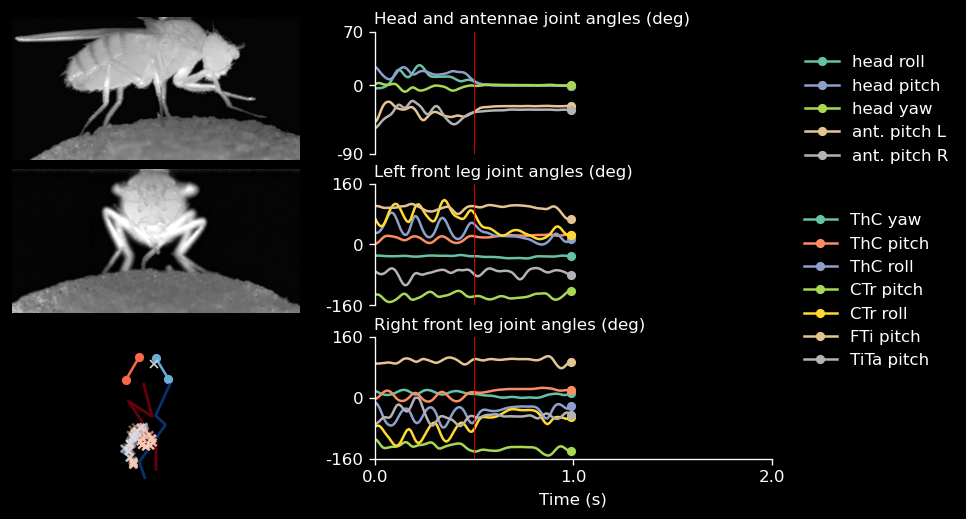

In [16]:
# plot config determines which body parts to plot
exp_type, plot_config = get_plot_config(data_path)

# loads the joint angles and the aligned pos
joint_angles, aligned_pose = load_grid_plot_data(data_path)

# as neck pose is one dimensional, make it consistent with the other key points
aligned_pose["Neck"] = np.tile(
    aligned_pose["Neck"],
    (aligned_pose["RF_leg"].shape[0], 1)
).reshape(-1, 1, 3)

# Start, end of the plotting data
t_start = 0
t_end = 200

# t: snapshot to show
t = t_start + 100
fps = 100

# Stimulation applied? If so, when
stim_lines=[50]

# Ignore this, we put it because we cropped the data in the previous tutorial
crop_time = 400 

fly_frames_front = video_frames_generator(video_path_front, t_start + crop_time, t_end + crop_time, stim_lines)
fly_frames_side = video_frames_generator(video_path_side, t_start + crop_time, t_end + crop_time, stim_lines)


fig = plot_grid(
    img_front=list(fly_frames_front)[t - t_start],
    img_side=list(fly_frames_side)[t - t_start],
    aligned_pose=aligned_pose,
    joint_angles=joint_angles,
    leg_angles_to_plot=leg_joint_angle_names,
    head_angles_to_plot=head_angles_to_plot,
    key_points_to_trail={'LF_leg':[3], 'RF_leg':[3]},
    marker_trail="x",
    t=t,
    t_start=t_start,
    t_end=t_end,
    fps=fps,
    trail=30,
    t_interval=100,
    stim_lines=stim_lines,
    #export_path=DATA_PATH / f'frame_{t}_alpha1.2_beta_0.png',
    **plot_config
)

plt.show()

One can also create such videos.

In [15]:
fly_frames_front = video_frames_generator(video_path_front, t_start + crop_time, t_end + crop_time, stim_lines)
fly_frames_side = video_frames_generator(video_path_side, t_start + crop_time, t_end + crop_time, stim_lines)


generator = plot_grid_generator(
    fly_frames_front=fly_frames_front,
    fly_frames_side=fly_frames_side,
    aligned_pose=aligned_pose,
    joint_angles=joint_angles,
    leg_angles_to_plot=leg_joint_angle_names,
    head_angles_to_plot=head_angles_to_plot,
    key_points_to_trail={'LF_leg':[3], 'RF_leg':[3]},
    marker_trail="x",
    t_start=t_start,
    t_end=t_end,
    fps=fps,
    trail=30,
    t_interval=100,
    stim_lines=stim_lines,
    **plot_config
)


make_video(
    str(data_path / 'grid_video.mp4'),
    generator,
    fps=fps,
    n_frames=t_end - t_start)

199it [00:58,  3.41it/s]


![gridvideo](./images/grid_video.gif)
